# k-Nearest Neighbour (KNN)

#### Alunos: Artur Bizon, Gabriel Schneider e Luciane Tedesco

Neste trabalho estamos criando um classificador k-Nearest Neighbour, um dos classificadores mais
simples. A tarefa a ser realizada é a seguinte:

Dado um conjunto de dados, você quer construir um programa que prevê novos exemplos para uma classe. Por exemplo, dado um conjunto de dígitos escritos à mão, você quer construir um programa que reconhece automaticamente o CEP das cartas.

### Grupo de dados 1:

In [1]:
import scipy.io as scipy
from src.helpers import normaliza_valores

# carregando os dados
data = scipy.loadmat('Dados/grupoDados1.mat')

# dividindo os dados
x_train, x_test, y_train, y_test = data['grupoTrain'], data['grupoTest'], data['trainRots'], data['testRots']

normalizedXTrain = normaliza_valores(x_train)
normalizedXTest = normaliza_valores(x_test)

print('x_train shape:' + str(x_train.shape))
print('y_train shape:' + str(y_train.shape))
print()
print('x_test shape:' + str(x_test.shape))
print('y_test shape:' + str(y_test.shape))

x_train shape:(100, 4)
y_train shape:(100, 1)

x_test shape:(50, 4)
y_test shape:(50, 1)


#### Implementação do K-NN:

In [2]:
import numpy as np
import statistics

class KNN:
    def __init__(self, K=3):
        self.K = K
        
        try:
            from src.helpers import calcula_distancia
            self.calcula_distancia = calcula_distancia
        except:
            print("Dependencias não encontradas")
        
    def fit(self, treinoX, treinoY, teste):
        treinados = []
        for elementoTeste in teste:
            vizinhos = []
            for elementoTreino in zip(treinoX,treinoY):
                distancia = self.calcula_distancia(elementoTeste,elementoTreino[0])
                vizinho = (elementoTreino[1],distancia)
                vizinhos.append(vizinho)
            vizinhos = sorted(vizinhos, key= lambda v: v[1])
            treinados.append(vizinhos)
        
        return treinados

    def predict(self, treinado):
        classificacao = []
        for elemento in treinado:
            # seleciona os k vizinhos para a moda
            nVizinhos = elemento[:self.K]
            labels = [int(vizinho[0]) for vizinho in nVizinhos]
            try:
                moda = statistics.mode(labels)
            # Caso nao seja possivel tirar a moda das classes, 
            # eh atribuido o valor do menor label com a maior 
            # quantidade de repeticoes
            except statistics.StatisticsError as st:
                array = np.array(labels)
                valores, quantidades = np.unique(array, return_counts=True)
                maiorQtd = np.amax(quantidades)
                for valor, quantidade in zip(valores, quantidades):
                    if quantidade == maiorQtd:
                        moda = valor
                        break
        
            classificacao.append(moda)

        return classificacao 

#### Testando a implementação 1-NN:

Implemente um classificador 1-NN usando a distância Euclidiana.

Para testar se você implementou a função corretamente, baixe o arquivo grupoDados1.mat - cada arquivo .mat contém 4 variáveis que são: grupoTest, grupoTrain, testRots, trainRots.

Então, verifique quantas classes foram previstas corretamente, isto é chamado de acurácia (accuracy). A acurácia deve ser de 96%.

In [3]:
oneNN = KNN(1)

treinado = oneNN.fit(normalizedXTrain, y_train, normalizedXTest)
classificado = oneNN.predict(treinado)

array = np.array(classificado)
resposta = y_test[:,0]

batata = array == resposta
acertos = batata[batata==True]
print("Acurácia = " + str(len(acertos)/len(array) * 100) + "%.")

Acurácia = 96.0%.


#### Testando a implementação do K-NN:

Implemente um classificador K-NN e teste novamente no conjunto de dados 1 (grupoDados1.mat).

Utilize k = 10 para uma acurácia igual a 94%.

In [4]:
# A acurácia chega em 96% se utilizarmos os dados normalizados

tenNN = KNN(10)

treinado = tenNN.fit(x_train, y_train, x_test)
classificado = tenNN.predict(treinado)

array = np.array(classificado)
resposta = y_test[:,0]

batata = array == resposta
acertos = batata[batata==True]
print("Acurácia = " + str(len(acertos)/len(array) * 100) + "%.")

Acurácia = 94.0%.


#### Visualizando os resultados gráficamente

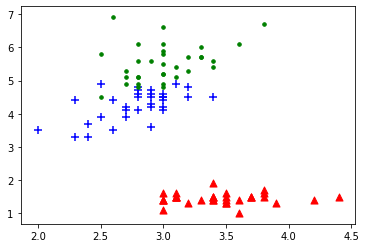

In [6]:
import matplotlib.pyplot as plt

def getDadosRotulo(dados, rotulos, rotulo, indice):
    ret = []
    for idx in range(0, len(dados)):
        if(rotulos[idx] == rotulo):
            ret.append(dados[idx][indice])        
    return ret

 

def visualizaPontos(dados, rotulos, d1, d2):
    fig, ax = plt.subplots() 
    ax.scatter(getDadosRotulo(dados, rotulos, 1, d1), getDadosRotulo(dados, rotulos, 1, d2), s=50, c='red' , marker='^')
    ax.scatter(getDadosRotulo(dados, rotulos, 2, d1), getDadosRotulo(dados, rotulos, 2, d2), s=50, c='blue' , marker='+')
    ax.scatter(getDadosRotulo(dados, rotulos, 3, d1), getDadosRotulo(dados, rotulos, 3, d2), s=50, c='green', marker='.')
    plt.show()
    pass


visualizaPontos(x_train, y_train, 1,2)

#### Resultados sobre o grupo de Dados 1

O grupoDados1 é um conjunto de dados de flores. Para mais informações consulte: http://archive.ics.uci.edu/ml/datasets/Iris

        Q1.1. Qual é a acurácia máxima que você consegue da classificação?

        Q1.2. É necessário ter todas as características (atributos) para obter a acurácia máxima para esta classificação?

- Questão 1:

In [7]:
def knn_grid_search(x_train, y_train, x_test, ks):
    accs = []
    Knn = None
    max_acc = -1
    
    for k in ks:
        knn = KNN(k)
        
        treinado = knn.fit(x_train, y_train, x_test)
        classificado = knn.predict(treinado)

        array = np.array(classificado)
        resposta = y_test[:,0]

        batata = array == resposta
        acertos = batata[batata==True]
        acc = len(acertos)/len(array)
        
        accs.append(acc)
        
        if acc > max_acc:
            Knn = knn
            max_acc = acc
        
    return accs, Knn


normalizedXTrain = normaliza_valores(x_train)
normalizedXTest = normaliza_valores(x_test)

accs, knn = knn_grid_search(normalizedXTrain, y_train, normalizedXTest, list(range(1, 61))) 
print("Q1.1: A acurácia máxima se dá com k=" + str(knn.K) + " obtendo: " + str(max(accs)*100) + "%.")

Q1.1: A acurácia máxima se dá com k=15 obtendo: 98.0%.


- Questão 2:

In [8]:
import pandas as pd

dt = data['grupoTrain']
dt = pd.DataFrame(dt)

dt['y_train'] = data['trainRots']
dt = dt.rename(columns={0: "x_train1", 1: "x_train2", 2: "x_train3", 3:"x_train4"})

dt.head()

,x_train1,x_train2,x_train3,x_train4,y_train
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,4.6,3.4,1.4,0.3,1


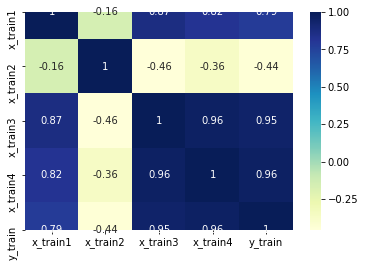

In [9]:
import seaborn as sns
%matplotlib inline 
sns.heatmap(dt.corr(), annot=True, cmap="YlGnBu")

Analisando o heatmap acima, podemos ver que a feature 2 tem uma baixa correlação com o valor que queremos predizer, podendo ser excluída.

A seguir demostraremos o resultado com a exclusão dessa caracteristica:

In [10]:
dt.drop(columns=['x_train2'])

,x_train1,x_train3,x_train4,y_train
0,5.1,1.4,0.2,1
1,4.9,1.4,0.2,1
2,4.6,1.5,0.2,1
3,5.0,1.4,0.2,1
4,4.6,1.4,0.3,1
...,...,...,...,...
95,5.8,5.1,1.9,3
96,6.7,5.7,2.5,3
97,6.7,5.2,2.3,3
98,6.5,5.2,2.0,3


In [11]:
dt = dt.values.tolist()

x_train = dt[:3]
normalizedXTest = normaliza_valores(x_test)

accs, knn = knn_grid_search(normalizedXTrain, y_train, normalizedXTest, list(range(1, 61))) 
print("Q1.2: A acurácia máxima se dá com k=" + str(knn.K) + " obtendo: " + str(max(accs)*100) + "%.")

Q1.2: A acurácia máxima se dá com k=15 obtendo: 98.0%.


### Grupo de Dados 2:

O Grupo de Dados 2 é um problema que visa prever a origem do vinho em base aos seus componentes
químicos. As características são:

1) Álcool

2) Ácido málico

3) Cinzas

4) Alcalinidade das cinzas

5) Magnésio

6) Fenóis totais

7) Flavonóides

8) Fenóis não flavonóides

9) Proantocianinas

10) Intensidade de cor

11) Tonalidade

12) OD280 / OD315 de vinhos diluídos

13) Prolina


    Q2.1: Aplique seu kNN a este problema. Qual é a sua acurácia de classificação?
    
    Q2.2: A acurácia pode ser igual a 98% com o kNN. Descubra por que o resultado atual é muito menor. Ajuste o conjunto de dados ou k de tal forma que a acurácia se torne 98% e explique o que você fez e por quê.

In [12]:
# carregando os dados
data = scipy.loadmat('Dados/grupoDados2.mat')

# dividindo os dados
x_train, x_test, y_train, y_test = data['grupoTrain'], data['grupoTest'], data['trainRots'], data['testRots']

normalizedXTrain = normaliza_valores(x_train)
normalizedXTest = normaliza_valores(x_test)

print('x_train shape:' + str(x_train.shape))
print('y_train shape:' + str(y_train.shape))
print()
print('x_test shape:' + str(x_test.shape))
print('y_test shape:' + str(y_test.shape))

x_train shape:(118, 13)
y_train shape:(118, 1)

x_test shape:(60, 13)
y_test shape:(60, 1)


In [13]:
accs, knn = knn_grid_search(normalizedXTrain, y_train, normalizedXTest, list(range(1, 61))) 
print("Q2.1: A acurácia máxima se dá com k=" + str(knn.K) + " obtendo: " + str(max(accs)*100) + "%.")

Q2.1: A acurácia máxima se dá com k=1 obtendo: 76.66666666666667%.


### Grupo de Dados 3:

    Q3.1: Aplique o kNN ao problema usando k = 1. Qual é a acurácia na classificação?
    
    Q3.2: A acurácia pode ser igual a 92% com o kNN. Descubra por que o resultado atual é muito menor. Ajuste o conjunto de dados ou k de tal forma que a acurácia se torne 92% e explique o que você fez e por quê.

In [14]:
# carregando os dados
data = scipy.loadmat('Dados/grupoDados3.mat')

# dividindo os dados
x_train, x_test, y_train, y_test = data['grupoTrain'], data['grupoTest'], data['trainRots'], data['testRots']

normalizedXTrain = normaliza_valores(x_train)
normalizedXTest = normaliza_valores(x_test)

print('x_train shape:' + str(x_train.shape))
print('y_train shape:' + str(y_train.shape))
print()
print('x_test shape:' + str(x_test.shape))
print('y_test shape:' + str(y_test.shape))

x_train shape:(100, 2)
y_train shape:(100, 1)

x_test shape:(50, 2)
y_test shape:(50, 1)


In [15]:
knn = KNN(1)

treinado = knn.fit(normalizedXTrain, y_train, normalizedXTest)
classificado = knn.predict(treinado)

array = np.array(classificado)
resposta = y_test[:,0]

batata = array == resposta
acertos = batata[batata==True]
print("Utilizando k=1, a acurácia foi de: " + str(len(acertos)/len(array) * 100) + "%.")

Utilizando k=1, a acurácia foi de: 66.0%.


In [16]:
# Sem a normalizaçao de dados o resultado se tornou superior
accs, knn = knn_grid_search(x_train, y_train, x_test, list(range(1, 51))) 
print("Q3.2: A acurácia máxima se dá com k=" + str(knn.K) + " obtendo: " + str(max(accs)*100) + "%.")
print("Encontramos o melhor K para o problema e não normalizamos os dados.")

Q3.2: A acurácia máxima se dá com k=10 obtendo: 96.0%.
Encontramos o melhor K para o problema e não normalizamos os dados.
